In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 


# Generate synthetic data and necessary preprocessing

Generate $1000$ samples in $\mathbb{R}^{20} \times \mathbb{R}^2$. We mannually add noises (from different distribution) to the first component in order to capture the worst case scenario in the unscaled version.

In [2]:
# Data Generation, d=2
X, y = make_regression(n_samples=1000, n_features=20, n_informative= 15, bias= 1, noise= 20, n_targets=2, random_state=42)
np.random.seed(231)
np.transpose(y)[:1]+= np.random.randn(1000)*50
# Split the set into 800pts training, 100pts calibration, and 100pts testing
X_train, X_test_cal, y_train, y_test_cal = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_cal, y_test, y_cal = train_test_split(X_test_cal, y_test_cal, test_size=0.5, random_state=122)

In [3]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.941256,0.968745,0.269235,-1.078364,0.339530,-1.180626,-0.589144,0.042907,-0.668149,-0.494912,-1.044086,0.328010,-0.224555,-0.579855,0.963951,-0.002686,0.482665,-1.049914,-0.518436,-1.058450
1,0.577364,1.184257,-0.038743,0.081278,-1.445205,0.666270,-0.128659,-0.608351,2.388372,1.406935,0.577979,-0.992866,0.722827,0.356973,-0.484118,0.592530,-0.037893,0.955269,0.409636,0.111799
2,0.760506,-0.044361,0.938640,-0.875842,-0.559546,-2.833030,-1.742948,-0.176112,1.010275,-0.607569,1.359189,0.786406,1.378467,1.128240,1.568182,0.082987,-0.805800,1.447796,-0.130926,-0.671512
3,0.513675,-0.764768,-0.408420,1.767929,0.742903,-2.070274,-0.661488,-0.710692,-1.861513,0.074628,0.041180,-0.199930,0.242463,-0.902910,-0.627037,0.683618,0.960740,-0.729573,-0.734952,0.323755
4,1.414744,-1.799357,1.874424,-1.243359,1.383057,-0.511868,-0.065529,0.125391,1.322404,-0.568539,1.546109,-0.288031,0.826584,0.243827,-0.287359,-0.608154,0.080041,2.664614,0.117041,1.374798


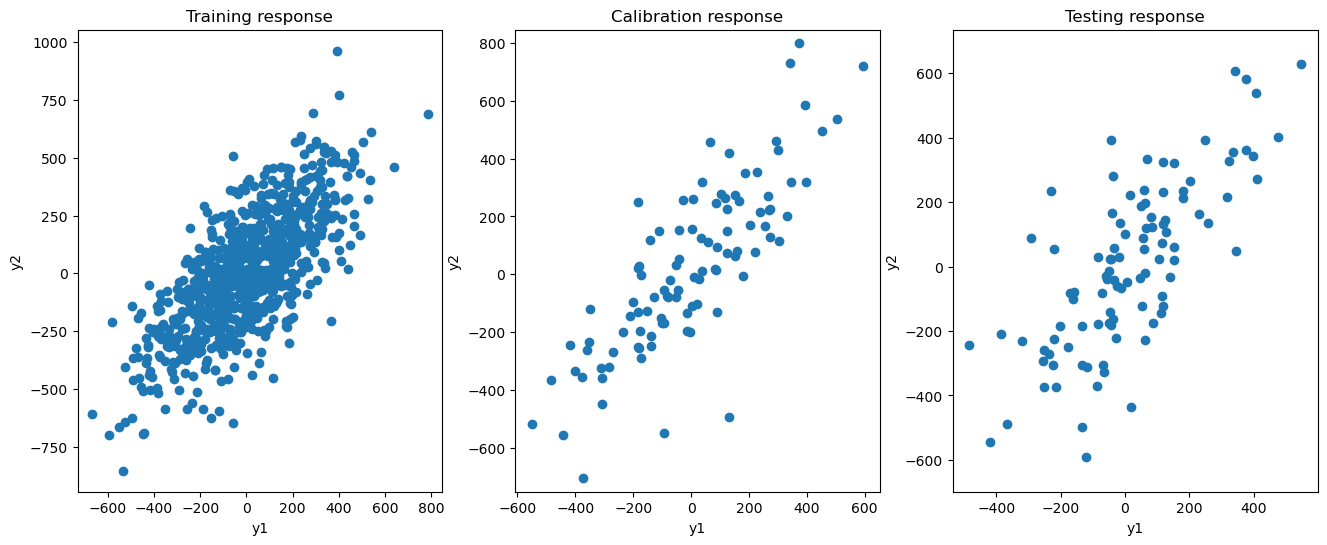

In [4]:
fig, (res1, res2, res3) = plt.subplots(1, 3, figsize = (16, 6))

res1.scatter(np.transpose(y_train)[0], np.transpose(y_train)[1])
res1.set(title = "Training response", xlabel = "y1", ylabel= "y2")
res1.axis('equal')

res2.scatter(np.transpose(y_cal)[0], np.transpose(y_cal)[1])
res2.set(title = "Calibration response", xlabel = "y1", ylabel= "y2")
res2.axis('equal')

res3.scatter(np.transpose(y_test)[0], np.transpose(y_test)[1])
res3.set(title = "Testing response", xlabel = "y1", ylabel= "y2")
res3.axis('equal')

plt.show()

In [5]:
# Fit model to training
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9666021165615502


In [6]:
# Vectorized calibration scores
prediction = model.predict(X_cal)
scores = np.abs(prediction - y_cal)
scores_T = np.transpose(scores)

# Test scores
prediction_test = model.predict(X_test)
scores_test = np.abs(prediction_test - y_test)

In [7]:
# Determine the right quantile
from math import ceil
alpha = 0.1
n = len(y_cal)
N = ceil((1+n)*(1-alpha))/n

# No scaling

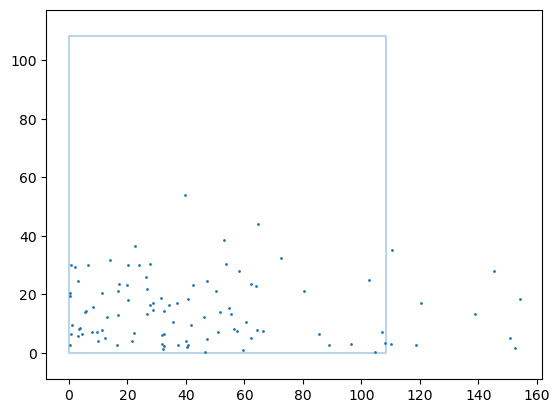

In [8]:
# Unscale supnorm quantile
normed_score_unscaled = np.max(scores, axis= 1)
quantile_unscaled = np.quantile(normed_score_unscaled, N)

# Draw the coverage region
plt.plot([0, quantile_unscaled, quantile_unscaled, 0, 0], [0, 0, quantile_unscaled, quantile_unscaled, 0], alpha = 0.3)
plt.scatter(scores_T[0], scores_T[1], s = 1)
plt.axis('equal')
plt.show()

In [9]:
thresh_unsacled = np.array([quantile_unscaled, quantile_unscaled])
thresh_unsacled

array([108.25039155, 108.25039155])

In [10]:
normed_score_unscaled

array([ 20.15311313,  22.29271294,  31.85113853,  80.45407627,
        24.39715163,  35.67271784,  29.98659506,  62.15216744,
       145.31384427, 118.74182449,  12.20111857,  46.5405041 ,
        32.06933572,  96.5317397 ,  32.67304533,  32.47438208,
         6.41570156,  20.51109448,  54.85639088, 152.57328448,
        50.45274534,  31.61716927,  57.51018882, 104.79236381,
        36.8685499 ,  59.62861124,  64.38293943,  29.91165564,
       150.89682292,  53.86186066,  21.62378195,  58.2430581 ,
        55.39516978,  23.60006154,  31.75621694,  26.72179809,
        54.07002866,   5.75980288, 110.56280299,  72.45732343,
        42.44368813, 154.15687027,  62.41870441,  34.34253009,
        47.27334018,   9.5380258 ,  40.07943396,  30.46416082,
        64.09068664,  41.80444431,  16.31484299,   9.98228307,
       138.99188627,   6.29609306, 108.08087414,  23.21024043,
        32.41768979,  14.3740189 ,  28.66045008,  52.90867012,
        11.27043318,  50.86300975,  60.43292245,  16.85

In [11]:
# Theoratical coverage
np.sum(np.all(scores<= thresh_unsacled, axis = 1))/(len(y_cal)+1)

0.900990099009901

In [12]:
# Empirical coverage
np.sum(np.all(scores_test <= thresh_unsacled, axis = 1))/(len(y_test))

0.94

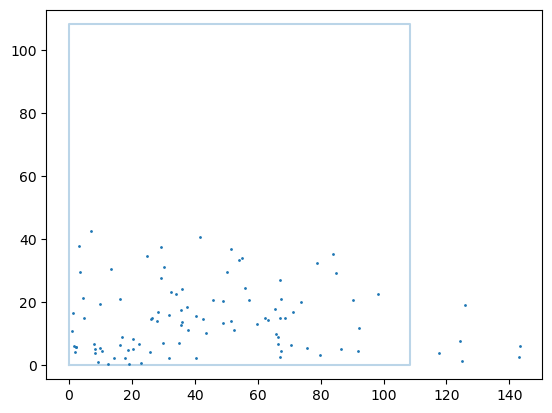

In [13]:
# Draw the empirical coverage region
plt.plot([0, quantile_unscaled, quantile_unscaled, 0, 0], [0, 0, quantile_unscaled, quantile_unscaled, 0], alpha = 0.3)
plt.scatter(np.transpose(scores_test)[0], np.transpose(scores_test)[1], s = 1)
plt.axis('equal')
plt.show()

# With scaling

## Original version

The construction of the prediction region reads as the following:
\begin{align*}
\hat{C}(X^{n+1}) &= \bigcup^{(n+1)^d}_{l=1} \times^d_{i=1}(\hat{f}(X^{n+1})_i-\hat{\sigma}^{y_l}_i\hat{Q}^l_{1-\alpha}, \hat{f}(X^{n+1})_i+\hat{\sigma}^{y_l}_i\hat{Q}^l_{1-\alpha}) \cap R_l\\
&=\bigcup^{(n+1)^d}_{l=1} \hat{C}^l(X^{n+1}) \cap R_l
\end{align*}
where 
1. $\{R_l\}^{(n+1)^d}_{l=1}$ are rectangles partitioning $\mathbb{R}^d$ based upon the order of the scores in each dimension.
2. $y_l$ is a random $y$ sampled from the rectangle $R_l$
3. $\hat{\sigma}^{y_l}_i$ is the standardeviation of the sets $\{S^1_i,...,S^n_i, S^{n+1}_i(y_l) := |\hat{f}(X^{n+1})_i - (y_l)_i|\}$
4. $\hat{Q}^l_{1-\alpha} := \frac{\lceil(n+1)(1-\alpha)\rceil}{n+1}$ th quantile of $\{\hat{S}^1 := ||(\frac{S^1_i}{\hat{\sigma}^{y_l}_i})^d_{i=1}||_\infty,...,\hat{S}^n := ||(\frac{S^n_i}{\hat{\sigma}^{y_l}_i})^d_{i=1}||_\infty\}$

Proof of coverage:
It follows from the construction that
\begin{align*}
\mathbb{P}(Y^{n+1} \in \hat{C}(X^{n+1})) &= \sum^{(n+1)^d}_{l=1} \mathbb{P}(Y^{n+1} \in \times^d_{i=1}(\hat{f}(X^{n+1})_i-\hat{\sigma}^{y_l}_i\hat{Q}^l_{1-\alpha}, \hat{f}(X^{n+1})_i+\hat{\sigma}^{y_l}_i\hat{Q}^l_{1-\alpha}), Y^{n+1} \in R_l)\\
&=\sum^{(n+1)^d}_{l=1} \mathbb{P}(\hat{S}^{n+1} \leq \hat{Q}^l_{1-\alpha}, Y^{n+1} \in R_l)\\
&=\sum^{(n+1)^d}_{l=1} \mathbb{P}(\hat{S}^{n+1} \leq \hat{Q}^l_{1-\alpha}| Y^{n+1} \in R_l)\mathbb{P}(Y^{n+1} \in R_l)\\
&=\frac{1}{(n+1)^d}\sum^{(n+1)^d}_{l=1} \mathbb{P}(\hat{S}^{n+1} \leq \hat{Q}^l_{1-\alpha}| Y^{n+1} \in R_l)\\
&\geq 1-\alpha
\end{align*}

## Tweaked version (larger prediction sets but easier to implement)

Take the component-wise maximum
$$
\hat{Q}_{1-\alpha, i} = \max_{1\leq l\leq (n+1)^d}{\hat{\sigma}^{y_l}_i\hat{Q}^l_{1-\alpha}}
$$
and design
$$
\hat{C}(X^{n+1}) = \times^d_{i=1}(\hat{f}(X^{n+1})_i-\hat{Q}^l_{1-\alpha, i}, \hat{f}(X^{n+1})_i+\hat{Q}^l_{1-\alpha, i}) 
$$
This construction yields a larger prediction sets so it preserves coverage. The implementation is below: 

In [14]:
# Save sorted data in each dimension separately
S0 = np.sort(scores_T[0])
S1 = np.sort(scores_T[1])

In [15]:
def AppendedScale(x, y):
    '''
    return the y dependent standardized scores and the scaled amount
    '''
    append = np.append(x, y)
    std = np.std(append)
    return x/std, std

In [16]:
scaled_quantile = np.zeros((n+1, n+1, 2))
scores_T_copy = np.copy(scores_T)

In [17]:
# Loop through the first dimension
for i in range(0, n+1):
    
    # Scale the first dimension to the right amount
    if i == 0:
        scores_T_copy[0], std0 = AppendedScale(scores_T[0], S0[i]/2)
    elif i == n:
        scores_T_copy[0], std0 = AppendedScale(scores_T[0], S0[i-1]+1/(n+1))
    else:
        scores_T_copy[0], std0 = AppendedScale(scores_T[0], (S0[i-1]+S0[i])/2)

    # Loop through the second dimension
    for j in range(0, n+1):

        # Scale the second dimension to the right amount
        if j == 0:
            scores_T_copy[1], std1 = AppendedScale(scores_T[1], S1[j]/2)
        elif j == n:
            scores_T_copy[1], std1 = AppendedScale(scores_T[1], S1[j-1]+1/(n+1))
        else:
            scores_T_copy[1], std1 = AppendedScale(scores_T[1], (S1[j-1]+S1[j])/2)

        normed_scaled_scores = np.max(scores_T_copy, axis = 0)
        quantile_scaled = np.quantile(normed_scaled_scores, N)
        scaled_quantile[i][j] = [quantile_scaled*std0, quantile_scaled*std1]

In [18]:
print(scaled_quantile)

[[[122.8430925   35.23743368]
  [122.86826462  35.23743368]
  [122.91338284  35.23743368]
  ...
  [120.66981179  35.28748657]
  [120.46857814  35.87164489]
  [120.31975684  36.31756052]]

 [[122.83374205  35.23743368]
  [122.85891226  35.23743368]
  [122.90402705  35.23743368]
  ...
  [120.66895728  35.28992285]
  [120.46773895  35.87412564]
  [120.31892897  36.32007521]]

 [[122.82981396  35.23743368]
  [122.85498336  35.23743368]
  [122.90009671  35.23743368]
  ...
  [120.6685983   35.29094643]
  [120.4673864   35.8751679 ]
  [120.31858119  36.32113174]]

 ...

 [[126.61145679  35.23743368]
  [126.6374011   35.23743368]
  [126.68390338  35.23743368]
  ...
  [124.19509551  35.23743368]
  [121.96887811  35.23743368]
  [120.65339982  35.33434318]]

 [[126.74965809  35.23743368]
  [126.77563072  35.23743368]
  [126.82218376  35.23743368]
  ...
  [124.33065926  35.23743368]
  [122.10201186  35.23743368]
  [120.66563587  35.29939595]]

 [[126.81834087  35.23743368]
  [126.84432758  35.2374

In [19]:
# Use a biggest rectangles produced, coverage region should be greater than what we had in the theory
thresh_scaled = np.max(scaled_quantile, axis = (0, 1))
print(thresh_scaled)

[127.91389093  36.48285695]


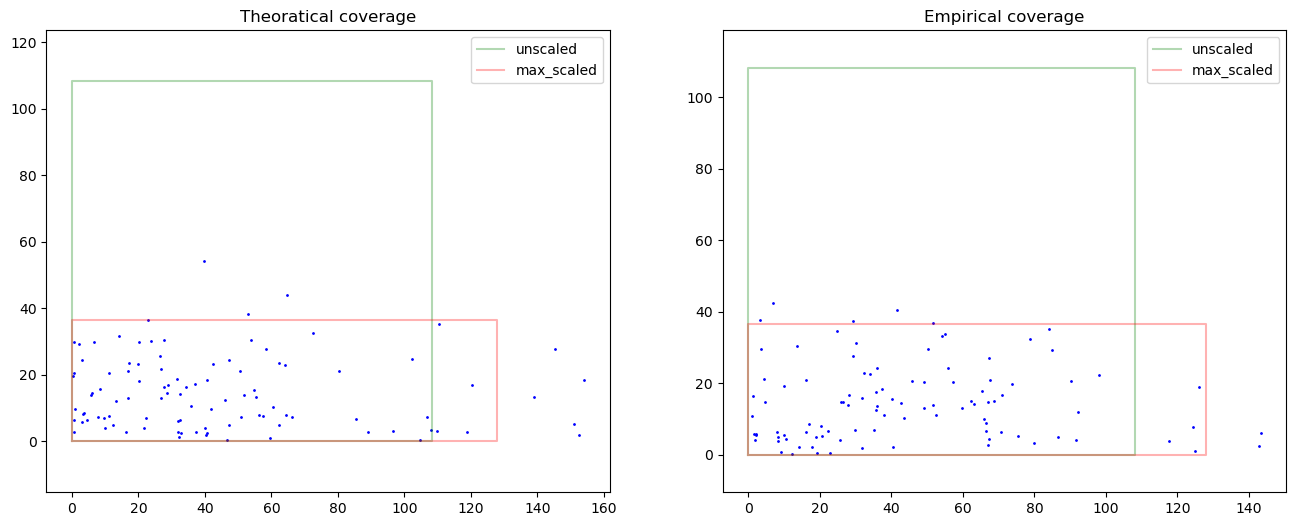

: 

In [ ]:
fig0, (ax01, ax02) = plt.subplots(1,2, figsize = (16, 6))

# Draw the coverage region
ax01.plot([0, quantile_unscaled, quantile_unscaled, 0, 0], [0, 0, quantile_unscaled, quantile_unscaled, 0], alpha = 0.3, color = "green" , label = "unscaled")
ax01.plot([0, thresh_scaled[0], thresh_scaled[0], 0, 0], [0, 0, thresh_scaled[1], thresh_scaled[1], 0], alpha = 0.3, color = "red", label = "max_scaled")
ax01.scatter(scores_T[0], scores_T[1], s = 1, color = "blue")
ax01.axis('equal')
ax01.legend()
ax01.set_title("Theoratical coverage")

# Draw the empirical coverage region
ax02.plot([0, quantile_unscaled, quantile_unscaled, 0, 0], [0, 0, quantile_unscaled, quantile_unscaled, 0], alpha = 0.3, color = "green", label = "unscaled")
ax02.plot([0, thresh_scaled[0], thresh_scaled[0], 0, 0], [0, 0, thresh_scaled[1], thresh_scaled[1], 0], alpha = 0.3, color = "red", label = "max_scaled")
ax02.scatter(np.transpose(scores_test)[0], np.transpose(scores_test)[1], s = 1, color = "blue")
ax02.axis('equal')
ax02.legend()
ax02.set_title("Empirical coverage")

plt.show()

In [21]:
# Coverage
print("Theoratical coverage: {}\nEmpirical coverage: {}".format(np.sum(np.all(scores <= thresh_scaled, axis = 1))/(n+1), np.sum(np.all(scores_test <= thresh_scaled, axis = 1))/(len(y_test))))

Theoratical coverage: 0.9108910891089109
Empirical coverage: 0.93


# Possible shortcuts

Either the original version or the tweaked version requires looping over $(n+1)^d$ many rectangles, which brings high computational complexity, so we need some possible shortcuts to produce same or larger prediction sets. From above, our original version should produce the tightest prediction sets while the tweaked version should produce the widest prediction sets, so in below, we are aiming for something in between.

## Option 1: mannually controlled splits

We can try to approximate the prediction sets in the following sense:

1. Specify an initial split , $2 \leq K \leq n$,  and number of dimensions to look at, $M \leq d$
2. Compute standard deviation of scores in every dimension, pick the dimension with highest standard deviation to start with, say dimension $j$
3. In dimension $j$, we will make $K$ splits based upon the quantile, i.e. $(1/K, 2/K,...,1)$ th quantile of the scores in the $j$-dimension. 
4. Now, go to the dimension with the second largest standard deviation and make $K$ splits just like the above
5. Stop after we have reached and completed splits for the first $M$ dimensions with largest standard deviation. In total, there should be (K+1)^M many neighborhoods to consider.
6. Construct prediction sets within these $(K+1)^M$ neighborhoods as before.

Below is an implementation with $K=2$ and $M=1$ in $2D$.

In [22]:
# K = 2, M = 1, d = 2
K = 2
M = 1
rectangle = np.zeros((K+1, 2))

# At which quantiles to split the scores
splits = np.linspace(1/K, 1, K)
q0 = np.quantile(S0, splits)
q1 = np.quantile(S1, splits)

# Determine which dimension to consider first
dim = np.argmax(np.std(scores_T, axis= 1))

scores_T_copy = np.copy(scores_T)

for i in range(0, K+1):
    if i == 0:
        scores_T_copy[dim], std0 = AppendedScale(scores_T[0], q0[i]/2)
    elif i == K:
        scores_T_copy[dim], std0 = AppendedScale(scores_T[0], q0[i-1]+1/(n+1))
    else:
        scores_T_copy[dim], std0 = AppendedScale(scores_T[0], (q0[i-1]+q0[i])/2)

    # Pick a random normalizer in the second dimension since we requires no split
    np.random.seed(i)
    index = np.random.randint(0, n+1)
    n1 = S1[index]
    scores_T_copy[1], std1 = AppendedScale(scores_T[1], n1)

    # Find the right length of rectangle in each division
    normed_scaled_scores = np.max(scores_T_copy, axis = 0)
    quantile_scaled = np.quantile(normed_scaled_scores, N)
    
    q_hat = np.array([quantile_scaled*std0, quantile_scaled*std1])
    # Append the shape to rectangle
    rectangle[i] = q_hat

    # Loop through the second dimension
    '''for j in range(0, K+1):

            # Scale the second dimension to the right amount
        if j == 0:
            scores_T_copy[1], std1 = AppendedScale(scores_T[1], q1[j]/2)
        elif j == len(splits):
            scores_T_copy[1], std1 = AppendedScale(scores_T[1], q1[j-1]+1/(n+1))
        else:
            scores_T_copy[1], std1 = AppendedScale(scores_T[1], (q1[j-1]+q1[j])/2)

        normed_scaled_scores = np.max(scores_T_copy, axis = 0)
        quantile_scaled = np.quantile(normed_scaled_scores, N)
        scaled_quantile[i][j] = [quantile_scaled*std0, quantile_scaled*std1]'''
        


In [23]:
print("K=2 Rectangle shape : {}\nMax Rectangle shape: {}".format(rectangle[1], thresh_scaled))

K=2 Rectangle shape : [123.84335658  35.23743368]
Max Rectangle shape: [127.91389093  36.48285695]


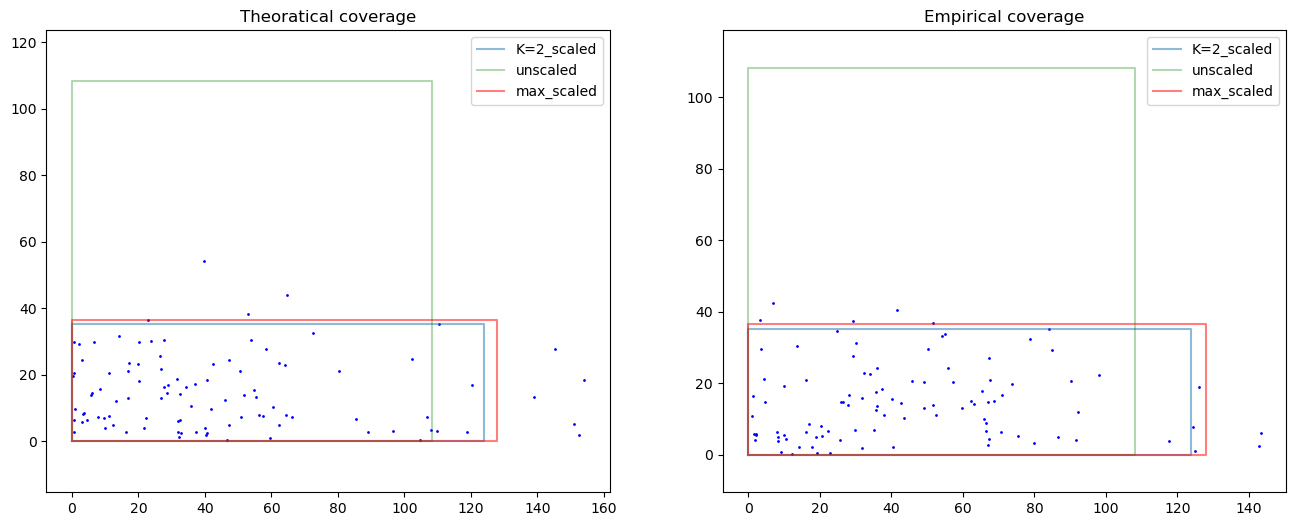

In [24]:
# Draw theoratical coverage
fig1, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
ax1.plot([0, rectangle[1][0], rectangle[1][0], 0, 0], [0, 0, rectangle[1][1], rectangle[1][1], 0], alpha = 0.5, label = "K=2_scaled")
ax1.plot([0, quantile_unscaled, quantile_unscaled, 0, 0], [0, 0, quantile_unscaled, quantile_unscaled, 0], alpha = 0.3, color = "green" , label = "unscaled")
ax1.plot([0, thresh_scaled[0], thresh_scaled[0], 0, 0], [0, 0, thresh_scaled[1], thresh_scaled[1], 0], alpha = 0.5, color = "red", label = "max_scaled")
ax1.scatter(scores_T[0], scores_T[1], s = 1, color = "blue")
ax1.axis('equal')
ax1.legend(loc = "upper right")
ax1.set_title("Theoratical coverage")

# Draw empirical coverage
ax2.scatter(np.transpose(scores_test)[0], np.transpose(scores_test)[1], s = 1, color = "blue")
ax2.plot([0, rectangle[1][0], rectangle[1][0], 0, 0], [0, 0, rectangle[1][1], rectangle[1][1], 0], alpha = 0.5, label = "K=2_scaled")  
ax2.plot([0, quantile_unscaled, quantile_unscaled, 0, 0], [0, 0, quantile_unscaled, quantile_unscaled, 0], alpha = 0.3, color = "green" , label = "unscaled")
ax2.plot([0, thresh_scaled[0], thresh_scaled[0], 0, 0], [0, 0, thresh_scaled[1], thresh_scaled[1], 0], alpha = 0.5, color = "red", label = "max_scaled")
ax2.axis('equal')
ax2.legend(loc = "upper right")
ax2.set_title("Empirical coverage")

plt.show()

In [25]:
# Covergae
print("Theoratical coverage: {}\nEmpirical coverage: {}".format(np.sum(np.all(scores <= rectangle[1], axis = 1))/(n+1), np.sum(np.all(scores_test <= rectangle[1], axis = 1))/n))

Theoratical coverage: 0.900990099009901
Empirical coverage: 0.9
